## The Impact of Twitter Sentiments on Stock Market Trends with AI and Machine Learning

# Introduction

Social media has become a popular platform for people to express their opinions and share their daily lives. It has the power to influence consumer behaviour and decision-making. Research has shown that 87% of internet consumers are influenced by customer reviews when making a purchase decision [1]. 

It has become evident that social media and other people's viewpoints significantly influence consumer behaviour. However, this influence could also be linked to stock trading behaviour, as people's opinions may affect their trading decisions, previous studies found that public mood collected from Twitter may be correlated with the Dow Jones Industrial Average Index [2]. 

This report presents an in-depth analysis that aims to predict the impact of Twitter sentiment on stock price trends. The report includes machine learning/deep learning methods to identify tweet sentiment patterns and stock price patterns. Analysing each tweet to evaluate its sentiment is a time-consuming process. Therefore, deep learning speeds up this process while giving us a sentiment accuracy score. Similarly, assessing how sentiment and financial features correlate with stock prices is also time-consuming. This report uses machine learning applications to make this process more efficient.

Twitter, a fundamental part of this project, is a real-time social media platform that allows users to follow, comment on, and share other users’ opinions [2]. By utilising machine learning for sentiment analysis, we can gain valuable insights into market sentiment and better understand its impact on the stock market. 

In this study, sentiment analysis identifies the sentiment expressed in a tweet then analyses it, identifying the sentiments the user expresses in the tweet and classifying their polarity and determining whether a tweet is positive or negative [3].

The report utilises two datasets: a Twitter dataset containing tweets relevant to the stock market, and a dataset of financial stock market data. After analysing the sentiment of the tweet text,  a merged dataset will be used that combines the sentiment scores with the stock market data. This will allow us to analyse the impact of sentiment scores on the stock market data, primarily focusing on the stock market's closing price attribute.

This report outlines a framework to identify positive and negative sentiments from tweet text and evaluate their impact on predicting stock prices. The framework will provide significant market insights to assist in making informed decisions regarding stocks and predicting their movements. Overall, this will help investors to be more knowledgeable about the stock market and make better investment decisions regarding sentiment predictions.

## Import Packages For Preprocessing

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras import layers
import matplotlib.pyplot as plt
import re
from cleantext import clean
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Dataset

For my project, I will work with two datasets I obtained from the Kaggle repository (the download can be found from the corresponding reference) [4]. The first dataset, 'stock_tweets.csv,' contains unstructured textual data in the form of tweet text, which I plan to use for sentiment analysis. This dataset also includes categorical data such as stock symbol, company name, and date of the tweets. The tweets were collected from 30-09-2021 to 30-09-2022, and the dataset contains over 80,000 tweets from the top 25 most-watched stock tickers on Yahoo Finance during that period.

## Stock Tweets Data

In [2]:
# Reading 'stock_tweets.csv' dataset
stock_tweets = pd.read_csv('C:/Users/maxsh/OneDrive/Desktop/University of Essex/Msc applied data science/MA336-AI and ML/AI&MLData/stock_tweets.csv')
# Printing specific rows
stock_tweets.iloc[11:16]

,Date,Tweet,Stock Name,Company Name
11,2022-09-29 21:33:05+00:00,Powerwall FTW! https://t.co/GWAaXXCrYv,TSLA,"Tesla, Inc."
12,2022-09-29 21:11:30+00:00,$TSLAQ: Tesla’s dead in Europe! Everyone else ...,TSLA,"Tesla, Inc."
13,2022-09-29 21:00:25+00:00,The irony is so thick you can cut it with a kn...,TSLA,"Tesla, Inc."
14,2022-09-29 20:15:41+00:00,Tesla AI day in 24 hours. Are you ready? $TSLA...,TSLA,"Tesla, Inc."
15,2022-09-29 19:38:29+00:00,Picked up some $TSLA shares at $269 https://t....,TSLA,"Tesla, Inc."


This dataset displays the representation of the tweets. The dataset consists of four attributes, which are shown in the figure. I will use the tweets' unstructured textual data to conduct sentiment analysis.

## Stock Finance Data

The second dataset is named 'stock_yfinance_data.csv' and comprises mostly numerical financial data such as open, high, low, close prices, and volume. However, it also includes categorical data such as stock name and date.

In [3]:
# Reading the 'stock_yfinance_data.csv' dataset
stock_finance = pd.read_csv('C:/Users/maxsh/OneDrive/Desktop/University of Essex/Msc applied data science/MA336-AI and ML/AI&MLData/stock_yfinance_data.csv')
# Printing the first 10 rows
stock_finance.iloc[11:15]

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
11,2021-10-15,274.579987,281.070007,274.116669,281.010010,281.010010,56773800,TSLA
12,2021-10-18,283.929993,291.753326,283.823334,290.036682,290.036682,72621600,TSLA
13,2021-10-19,292.510010,292.649994,287.503326,288.089996,288.089996,52143300,TSLA
14,2021-10-20,288.450012,289.829987,285.793335,288.600006,288.600006,42096300,TSLA


This dataset represents the finance data for stocks, including the highest peak, lowest point, and opening and closing prices per date. The data comprises eight attributes, which are displayed in the figure.

# Preliminary Analysis

## Cleaning Data

I have analysed a set of tweets and found that out of 80,793 tweets, only 64,479 were unique. Since these tweets are date-based, removing duplicates could potentially impact the accuracy of the analysis. Therefore, I have decided to keep the duplicate tweets for this analysis. However, I have removed URLs and @ mentions from the tweet text using functions. This will allow me to focus solely on the text without the URLs and mentions potentially influencing the sentiment analysis. I have also removed emojis from the dataset as they are not required for the analysis. These steps will help reduce noise from the dataset, improving the accuracy of sentiment prediction. However, the decision was made not to remove stopwords so that the analysis could be done on the entire tweet.

**Removing URL and Mentions from Tweets** 

* Reference for code can be accessed through [5]. 
* I split the function into two separate functions to make it easier to understand the regex expressions being used to remove data.

**Removing Emojis from Tweets**

* Reference for code can be accessed through [6]. 
* I modified the code by adding more unicode ranges to include additional emojis. The list of emoji unicode ranges can be accessed through reference [7].


In [4]:
# Displaying Duplicates
stock_tweets.select_dtypes('object').nunique() # 64479 unique tweets. 

# Checking for NA values
stock_tweets.isna().sum() # No NA values

# Defining Function to Remove URLs from Tweets 
def remove_urls(tweet): 
    return re.sub(r'http\S+', '', tweet)

# Defining Function to Remove Mentions (@s) from Tweets
def remove_mentions(tweet):
    return re.sub(r'@[\w_]+', '', tweet)

# Applying these functions to the stock_tweets dataset to remove URLs and Mentions (@s)
stock_tweets['Tweet'] = stock_tweets['Tweet'].apply(remove_urls)
stock_tweets['Tweet'] = stock_tweets['Tweet'].apply(remove_mentions)

# Defining the remove_emojis function to remove Emojis from tweets
def remove_emojis(data):
    emoj = re.compile(r"[" 
                   u"\U0001F300-\U0001F5FF" # Miscellaneous Symbols And Pictographs
                   u"\U0001F900-\U0001F9FF" # Supplemental Symbols and Pictographs
                   u"\U0001FA70-\U0001FAFF" # Symbols and Pictographs Extended-A
                   u"\U0001F600-\U0001F64F" # Emoticons (Emoji)
                   u"\U0001F680-\U0001F6FF" # Transport and Map Symbols
                   u"\U00002600-\U000026FF" # Miscellaneous Symbols
                   u"\U00002700-\U000027BF" # Dingbats  
                   u"\U0001F800-\U0001F8FF" # Supplemental Arrows-C
                   u"\U0001FA00-\U0001FA6F" # Chess Symbols
                   u"\U0001FB00-\U0001FBFF" # Alchemical Symbols
                   "]+", re.UNICODE) # Enables unicode matching
    return re.sub(emoj, '', data) # replaces emojis with blank space

# Applying the remove_emojis function to the tweets
stock_tweets['Tweet'] = stock_tweets['Tweet'].apply(remove_emojis)

# Displaying Dataset to check if functions were correctly implemented
stock_tweets

Date            64424
Tweet           64479
Stock Name         25
Company Name       25
dtype: int64

Date            0
Tweet           0
Stock Name      0
Company Name    0
dtype: int64

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,Hahaha why are you still trying to stop Tes...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"Stop trying to kill kids, you sad deranged o...",TSLA,"Tesla, Inc."
...,...,...,...,...
80788,2021-10-07 17:11:57+00:00,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.
80789,2021-10-04 17:05:59+00:00,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.
80790,2021-10-01 04:43:41+00:00,Our record delivery results are a testimony of...,XPEV,XPeng Inc.
80791,2021-10-01 00:03:32+00:00,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.


## Sentiment Score

**Calculating Sentiment Score With the Vader Software Package**

As part of my analysis, I utilised the Vader (Valence Aware Dictionary for Sentiment Reasoning) software package to calculate sentiment scores for tweets. This tool automatically assigns a score to each text, with lower ratings indicating a more negative tweet and higher ratings indicating a more positive one. I then categorised these scores in the following manner: if a sentiment score exceeded 0.2, it was classified as 1 (positive), while if it was less than or equal to 0.2, it was classified as 0 (negative). These categorised scores will be utilised to test the accuracy of sentiment analysis using an artificial neural network (ANN).

**Sentiment Calculations**

* Reference for code can be accessed through the following reference: [7].

* I utilised the Python code example from the vader documentation to construct the sentiment analyser. 

* I modified the code by including an additional classification section that categorises the sentiments as either positive or negative.

In [5]:
# Calculating Sentiment Score with the Vader Software Package

# I created a new copy of my Stock_Tweets dataset to implement new columns.
stock_tweets_new = stock_tweets.copy(deep=True)

analyser = SentimentIntensityAnalyzer() # Vader function to determine tweets sentiment
# Defining the get_sentiment_score function for each tweet.
def get_sentiment_score(tweet):
    return analyser.polarity_scores(tweet)['compound'] # This assigns a score to each tweet.

# This applies the function to the dataset, 
# creating a new column including the sentiment score for each tweet.
stock_tweets_new['sentiment_score'] = stock_tweets_new['Tweet'].apply(get_sentiment_score)

# For my Artificial Neural Network, a categorical variable is needed 
# to identify the accuracy of the calculated sentiment.
# Here, I have created a function categorising the sentiment scores into positive and negative values.
def categorise_sentiment_numeric(score):
    if score > 0.2:
        return 1
    elif score <= 0.2:
        return 0
# 1 represents a positive score
# 0 represents a negative score

# This applies the function to the dataset and replaces the previous sentiment scores with the new
# categorised sentiments.
stock_tweets_new['sentiment_score'] = stock_tweets_new['sentiment_score'].apply(categorise_sentiment_numeric)

# Displaying dataset to ensure that the function has worked.
stock_tweets_new

,Date,Tweet,Stock Name,Company Name,sentiment_score
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",0
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",1
3,2022-09-29 22:40:07+00:00,Hahaha why are you still trying to stop Tes...,TSLA,"Tesla, Inc.",0
4,2022-09-29 22:27:05+00:00,"Stop trying to kill kids, you sad deranged o...",TSLA,"Tesla, Inc.",0
...,...,...,...,...,...
80788,2021-10-07 17:11:57+00:00,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.,0
80789,2021-10-04 17:05:59+00:00,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.,1
80790,2021-10-01 04:43:41+00:00,Our record delivery results are a testimony of...,XPEV,XPeng Inc.,1
80791,2021-10-01 00:03:32+00:00,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.,1


**Sentiment Negative/Positive Percentage**

**Positive and Negative Sentiment Calculation**

* Code Reference: MA336 LAB 5

In [6]:
# Defining the number of positive and negative tweets
pos = len(stock_tweets_new[stock_tweets_new["sentiment_score"] == 1])
neg = len(stock_tweets_new[stock_tweets_new["sentiment_score"] == 0])

# Defining the total length of the dataset to calculate percentage
tot = len(stock_tweets_new)

# Calculating percentage of positve and negative tweets.
print("Positive sentiment: ",(pos),"tweets (",(round(pos/tot*100,2)),"% )")
print("Negative sentiment: ",(neg),"tweets (",(round(neg/tot*100,2)),"% )")

Positive sentiment:  37007 tweets ( 45.8 % )
Negative sentiment:  43786 tweets ( 54.2 % )


Here, there is a fairly even distribution with slightly more negative tweets.

## Stock Tweets/Stock Finance Dataset Merge

As indicated in the dataset section of this report, I will be utilising two distinct datasets for my analysis. To combine these datasets, I utilised the 'Date' and 'Stock Name' attributes. However, I encountered a challenge as the 'Date' attribute for both datasets was in different formats. The stock finance dataset utilised the %Y-%m-%d %H:%m:%s format, while the tweet date format was in the %Y-%m-%d format. To address this, I converted the stock finance date format to match the tweet date format, which enabled me to merge the datasets using the 'Date' attribute successfully.

* Sentiment tweet analyser can be accessed through the following reference: [8].

In [7]:
# Here, I am narrowing down the scope and focusing on only the AMD stocks
stock_tweets_AMD = stock_tweets_new[stock_tweets_new['Stock Name'] == 'AMD']

# The stock_tweets data uses an hourly date format, therefore, I need to reformat it 
# so that it matches up with the stock finance data which is necessary for merging the data.
stock_tweets_AMD['Date'] = pd.to_datetime(stock_tweets_new['Date']).dt.strftime('%Y-%m-%d')

# Recalculating the sentiment scores, as the next part of the analysis will 
# be using the sentiment scores as continuous data rather than categorical.
analyser = SentimentIntensityAnalyzer()
def get_sentiment_score(tweet):
    return analyser.polarity_scores(tweet)['compound']
# Applying the function to the dataset and creating the sentiment score attribute
stock_tweets_AMD['sentiment_score'] = stock_tweets_AMD['Tweet'].apply(get_sentiment_score)

# I have to calculate the mean scores for each day as previously the data was in an hourly format
# representing the time the tweets were made.
stock_tweets_AMD['daily_sentiment_scores'] = stock_tweets_AMD.groupby('Date')['sentiment_score'].transform('mean')

# Displays the dataset to ensure it is up-to-date with recent changes made.
stock_tweets_AMD

C:\Users\maxsh\AppData\Local\Temp\ipykernel_3424\1120162227.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_tweets_AMD['Date'] = pd.to_datetime(stock_tweets_new['Date']).dt.strftime('%Y-%m-%d')
C:\Users\maxsh\AppData\Local\Temp\ipykernel_3424\1120162227.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_tweets_AMD['sentiment_score'] = stock_tweets_AMD['Tweet'].apply(get_sentiment_score)
C:\Users\maxsh\AppData\Local\Temp\ipykernel_3424\1120162227.py:18: SettingWithCopyWarning: 
A value is t

,Date,Tweet,Stock Name,Company Name,sentiment_score,daily_sentiment_scores
53731,2022-09-29,$MSFT $GOOGL $NVDA $AMD all hit 52W low today....,AMD,"Advanced Micro Devices, Inc.",-0.6696,0.218037
53732,2022-09-29,After trading for 9+ years \n\nThis is how to ...,AMD,"Advanced Micro Devices, Inc.",0.3612,0.218037
53733,2022-09-29,$AMD - (Weekly) Update - Finally filling the i...,AMD,"Advanced Micro Devices, Inc.",0.7351,0.218037
53734,2022-09-29,"$AMD\nHave I ever told you guys what a ""Volume...",AMD,"Advanced Micro Devices, Inc.",0.3612,0.218037
53735,2022-09-29,Thank you for inviting us for the launch of t...,AMD,"Advanced Micro Devices, Inc.",0.8997,0.218037
...,...,...,...,...,...,...
55953,2021-09-30,Read 's breakdown of our ambitious 2025 Energy...,AMD,"Advanced Micro Devices, Inc.",0.7717,0.417583
55954,2021-09-30,$AMD Breakout and retest..,AMD,"Advanced Micro Devices, Inc.",0.0000,0.417583
55955,2021-09-30,Built by our very own Product Engineering Man...,AMD,"Advanced Micro Devices, Inc.",0.7833,0.417583
55956,2021-09-30,$AMD expanding partnership with $GOOGL Cloud t...,AMD,"Advanced Micro Devices, Inc.",0.0000,0.417583


## Performing the Dataset merge

**Dataset Merge**
* I have used Pandas Code Documentation to help understand how to merge two datasets.

* Pandas documentation used can be accessed from the following reference [9].


In [8]:
# Merging the data on Stock Name and Date
merge_stock_sentiment = pd.merge(stock_tweets_AMD, stock_finance, on=['Date', 'Stock Name'])
merge_stock_sentiment = merge_stock_sentiment.groupby(['Date', 'Stock Name']).first().reset_index()

# Here I drop sentiment_score as I am replacing it with the daily sentiment score which is more accurate.
merge_stock_sentiment = merge_stock_sentiment.drop(columns=['sentiment_score'])
# Renaming the dataset to represent the filtered data for the AMD stocks
stock_sentiment_AMD = pd.DataFrame(merge_stock_sentiment) 

stock_sentiment_AMD.iloc[7:11]

,Date,Stock Name,Tweet,Company Name,daily_sentiment_scores,Open,High,Low,Close,Adj Close,Volume
7,2021-10-12,AMD,FREE #OPTIONS Ideas \n\nScale out when above 2...,"Advanced Micro Devices, Inc.",0.483380,105.169998,106.040001,104.339996,105.040001,105.040001,34039900
8,2021-10-13,AMD,Best day in some time \n\nBack to 2 commas \n\...,"Advanced Micro Devices, Inc.",0.227100,106.279999,109.879997,106.250000,109.160004,109.160004,55631900
9,2021-10-14,AMD,"Alright, everyone, that's it for tonight. Have...","Advanced Micro Devices, Inc.",0.599529,110.500000,112.220001,109.629997,111.989998,111.989998,46900200
10,2021-10-15,AMD,Lol they asked Mark Minervini what $UPST does ...,"Advanced Micro Devices, Inc.",0.538167,112.510002,112.839996,111.110001,112.120003,112.120003,34203000


This dataset showcases the integration of the sentiment score attribute from the stock Twitter dataset with the stock finance dataset. As this dataset will be utilised for various tests, I have not classified the sentiment score. To ensure that the analysis remains unambiguous, I will only consider the stock name 'AMD' in conjunction with this merged dataset. This approach aims to prevent the inclusion of duplicate dates by stocks with the same dates, which could complicate the analysis, and to ensure that results and predictions are as accurate as possible. 

This merged dataset will be used for the supervised random forest model and the Long-term Short Memory Recurrent Neural Network model. However, both models will include new features engineered from the dataset.


## Feature Engineering
**Creating Financial Indicators to test how the sentiment attributes perform against them**

When forecasting a stock's price movement, relying solely on sentiment as an independent predictor might lead to inaccurate results. I also needed extra predictors to determine sentiment's effectiveness in predicting stock price movement. Thus, feature engineering was necessary to introduce new features to the merged dataset for comparison.

In the dataset, two distinct categories of features were added. Firstly, new features were created based on the sentiment score. Two such features include the Sentiment Change, which is the difference between the sentiment score of the current day and the previous day, and the Lagged Sentiment feature, which shifts each sentiment score up one position. This shift helps models consider the previous day's score when making predictions.

Some financial indicators have been added to improve the dataset's predictive power. The dataset now includes a Simple Moving Average (SMA) with a window of 7 days and 20 days to indicate the average price of the close attribute over the window period. Additionally, the standard deviation of the close attribute has been included to capture variance. The Relative Strength Index (RSI) has also been added to measure the speed and change of price movements. Moving Average Convergence Divergence (MACD) was included to show the relationship between two moving averages. Lastly, a Stochastic Oscillator has been added to indicate whether a stock has moved into an overbought or oversold condition. 


**Relative Strength Index feature**

* Code Reference can be accessed through [10].
    
* I adapted this code by adding the rolling mean into the gain and loss objects to simplify the code.

**Moving Average Convergence Divergence Feature**

* Code Reference can be accessed through [11]. 
    
* I simplified the code by adding attributes directly to the dataframe and removing unnecessary ones, such as the exponentially-weighted means that are no longer needed.


**Stochastic Oscillator**

* Code Reference can be accessed through [12].

* I adapted the code to make it easier to understand.


In [9]:
# Creating Feature for whether the stock price has moved up or down from the open price.
# Finding whether the stock price has moved up from the open price to the close price
stock_sentiment_AMD['Move_Up'] = (stock_sentiment_AMD['Close'] > stock_sentiment_AMD['Open']).astype(int)
# Finding whether the stock price has moved down from the open price to the close price
stock_sentiment_AMD['Move_Down'] = (stock_sentiment_AMD['Close'] <= stock_sentiment_AMD['Open']).astype(int)

# Creating a lagged sentiment feature, which shifts the sentiment scores up one row, so the models,
# can use previous sentiment scores to predict the target.
stock_sentiment_AMD['Lagged_Sentiment'] = stock_sentiment_AMD['daily_sentiment_scores'].shift(1)

# I have calculated the sentiment change from the current day sentiment from the previous days sentiment.
stock_sentiment_AMD['Sentiment_Change'] = stock_sentiment_AMD['daily_sentiment_scores'] - stock_sentiment_AMD['Lagged_Sentiment']

# I have created two moving average features for the closing price with two windows, 7 and 20.
# I have also created a standard deviation feature for the close price to capture variance.
stock_sentiment_AMD['SMA7_Close'] = stock_sentiment_AMD['Close'].rolling(window=7).mean()
stock_sentiment_AMD['SMA20_Close'] = stock_sentiment_AMD['Close'].rolling(window=20).mean()
stock_sentiment_AMD['SD10_Close'] = stock_sentiment_AMD['Close'].rolling(window=10).std()

# The starting values for each feature will have NA values which need to be replaced.
# This is because there are no previous values to use to calculate.
stock_sentiment_AMD['Lagged_Sentiment'].fillna(0)
stock_sentiment_AMD['Sentiment_Change'].fillna(0)
stock_sentiment_AMD['SD10_Close'] = stock_sentiment_AMD['SD10_Close'].fillna(0)
stock_sentiment_AMD['SMA20_Close'] = stock_sentiment_AMD['SMA20_Close'].fillna(0)
stock_sentiment_AMD['SMA7_Close'] = stock_sentiment_AMD['SMA7_Close'].fillna(0)

# Relative Strength Index (RSI)
# Define the function. States period of 14, representing 14 days.
def calculate_rsi(stock_sentiment_AMD, period=14): 
    close_diff = stock_sentiment_AMD['Close'].diff()  # Difference between close values
    gain = (close_diff.where(close_diff > 0, 0)).rolling(window=period).mean() # Sets all negative values to 0
    loss = (-close_diff.where(close_diff < 0, 0)).rolling(window=period).mean() # Sets all positive values to 0

# Calculates the exponentially weighted moving average
# elative Strength calculated by dividing average gain with average loss
    rs = gain / loss
# Calculates the RSI, indicating overbough or oversold conditions in a stock
    return 100 - (100 / (1 + rs))
# Adding New RSI feature to the dataset
stock_sentiment_AMD['RSI'] = calculate_rsi(stock_sentiment_AMD)

# Moving Average Convergence Divergence (MACD)
# The period here represents the number of days.
# Calculate the 12-period EMA for the Close prices of the stock.
# adjust is set to false to aviod bias.
# Span is set to 12 to specify the period.
stock_sentiment_AMD['EMA12'] = stock_sentiment_AMD['Close'].ewm(span=12, adjust=False).mean()

# This is the same as the pervious, however, I have increased the span to 26 periods
stock_sentiment_AMD['EMA26'] = stock_sentiment_AMD['Close'].ewm(span=26, adjust=False).mean()

# Calculates MACD by subtracting the 26-period EMA from the 12-period EMA 
stock_sentiment_AMD['MACD'] = stock_sentiment_AMD['EMA12'] - stock_sentiment_AMD['EMA26']

# Dropping columns which are no longer needed
stock_sentiment_AMD.drop(columns = ['EMA12','EMA26'], axis = 1, inplace = True)


# Stochastic Oscillator
# Setting the window size to 14 which represents 14 days.
window = 14

# Calculates the rolling maximum of the High prices over a window of 14 days
high_max = stock_sentiment_AMD['High'].rolling(window).max()
# Calculates the rolling minimum of the Low prices over a wimdow of 14 days
low_min = stock_sentiment_AMD['Low'].rolling(window).min()

# This calculates the Stochastic Oscillator
# Calculates difference between Closing price and low_min
# It also calculates the difference between high_max and low_min
# Finally calculating the Stochastic Oscillator feature by finding the ratio of these 
# and multiplying by 100 to get a percentage
stock_sentiment_AMD['Stochastic_Oscillator'] = ((stock_sentiment_AMD['Close'] - low_min) / (high_max - low_min)) * 100

# Making sure there are no NA values.
stock_sentiment_AMD = stock_sentiment_AMD.fillna(0)

# Dropping columns for the Random Forest
Stock_AMD_rf = stock_sentiment_AMD.drop(columns=['Stock Name', 'High', 'Low',
                            'Adj Close', 'Date', 'Close', 'Open','Volume', 'Company Name', 'Tweet'])
Stock_AMD_rf

0      0.000000
1      0.417583
2      0.649650
3      0.797750
4      0.940100
         ...   
244   -0.040000
245    0.230870
246    0.197480
247    0.403633
248    0.230650
Name: Lagged_Sentiment, Length: 249, dtype: float64

0      0.000000
1      0.232067
2      0.148100
3      0.142350
4     -0.553083
         ...   
244    0.270870
245   -0.033390
246    0.206153
247   -0.172983
248   -0.012612
Name: Sentiment_Change, Length: 249, dtype: float64

,daily_sentiment_scores,Move_Up,Move_Down,Lagged_Sentiment,Sentiment_Change,SMA7_Close,SMA20_Close,SD10_Close,RSI,MACD,Stochastic_Oscillator
0,0.417583,1,0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
1,0.649650,0,1,0.417583,0.232067,0.000000,0.0000,0.000000,0.000000,-0.035898,0.000000
2,0.797750,0,1,0.649650,0.148100,0.000000,0.0000,0.000000,0.000000,-0.231933,0.000000
3,0.940100,1,0,0.797750,0.142350,0.000000,0.0000,0.000000,0.000000,-0.265613,0.000000
4,0.387017,1,0,0.940100,-0.553083,0.000000,0.0000,0.000000,0.000000,0.081168,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
244,0.230870,0,1,-0.040000,0.270870,73.875715,79.8430,4.563866,27.343155,-5.230484,6.044535
245,0.197480,0,1,0.230870,-0.033390,72.395715,78.5990,4.209904,27.202626,-5.618555,0.257350
246,0.403633,0,1,0.197480,0.206153,71.061429,77.5330,4.510903,27.149126,-5.789170,5.945113
247,0.230650,1,0,0.403633,-0.172983,69.860001,76.6040,4.384993,21.434207,-5.761939,11.991873


## Data Exploration

**Plotting Tweet Distribution**

* Matplotlib Tutorials were used for graph visualisation which can be accessed through [13].

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Date'>

Text(0.5, 1.0, 'Tweet Distribution Over Time')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Number of Tweets')

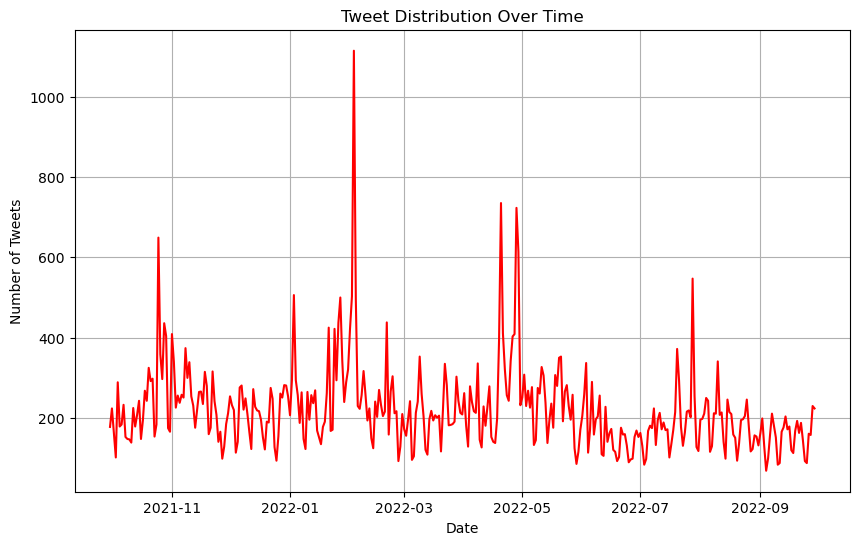

In [10]:
# Changing Date to datetime format
stock_tweets['Date'] = pd.to_datetime(stock_tweets['Date'])

# Grouping Dates together to analyse trends by each month
tweet_distribution = stock_tweets.groupby(stock_tweets['Date'].dt.date).size()

# Plotting line plot.
plt.figure(figsize=(10, 6)) # Setting figure size
tweet_distribution.plot(kind='line', color = 'red') # Setting graph type and line colour
plt.title('Tweet Distribution Over Time') # Adding title
plt.xlabel('Date') # Adding X-axis label
plt.ylabel('Number of Tweets') # Adding Y-axis Label
plt.grid(True) # Adding Grid so it is easy to understand trends
plt.savefig('TweetDistribution.png') # saving figure as a png file
plt.show() # Displaying plot

The Figure above displays the tweet distribution over time. The x-axis represents the data, ranging from November 2021 to September 2022. The y-axis shows the count of tweets which ranges from 0 to 1000. The red line depicts the fluctuation in tweet volume over the time period. There are two notable spikes in Twitter activity which occur in Feburary 2022 and around May 2022.

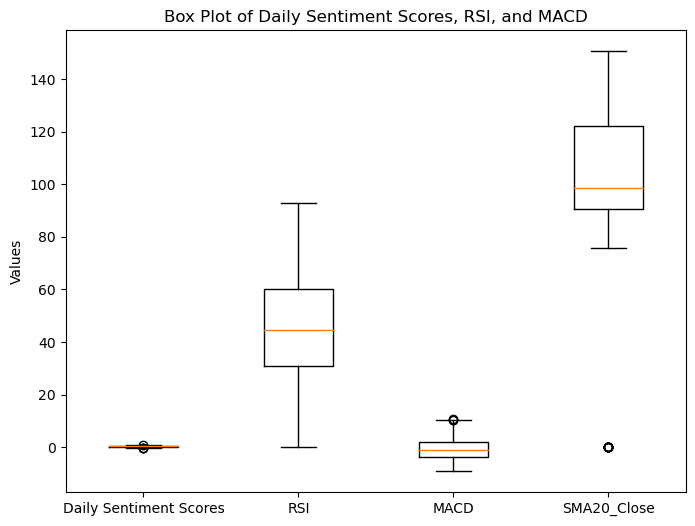

In [12]:
plt.figure(figsize=(8, 6)) # Setting figure size

# Setting boxplot features
features = [stock_sentiment_AMD['daily_sentiment_scores'], stock_sentiment_AMD['RSI'], 
             stock_sentiment_AMD['MACD'],stock_sentiment_AMD['SMA20_Close']] 
# Adding features to the boxplot
plt.boxplot(features)
plt.title('Box Plot of Daily Sentiment Scores, RSI, and MACD') # Adding Title
plt.ylabel('Values') # Adding Y-axis label
# Setting each individual feature name to the x-axis using plt.xticks
plt.xticks([1, 2, 3, 4], ['Daily Sentiment Scores', 'RSI', 'MACD', 'SMA20_Close']) 
plt.savefig('Boxplot.png') # Saving plot as a png file
plt.show();

The above boxplot illustrates different financial indicators and sentiment scores. The x-axis lists four features, while the y-axis ranges from 0 to 140. The daily sentiment scores have a narrow range, with an outlier above and below the primary distribution. The RSI has a wider range with more variability. The MACD has a small range with a single outlier above the primary distribution. However, SMA20_Close has a large range with a single outlier far below the primary distribution. The significant difference between each feature suggests that scaling features may be necessary when predicting stock prices to ensure that each feature is on a similar scale.

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Scatter Plot of Daily Sentiment Scores vs. SMA7_Close')

Text(0.5, 0, 'Daily Sentiment Scores')

Text(0, 0.5, 'SMA7_Close')

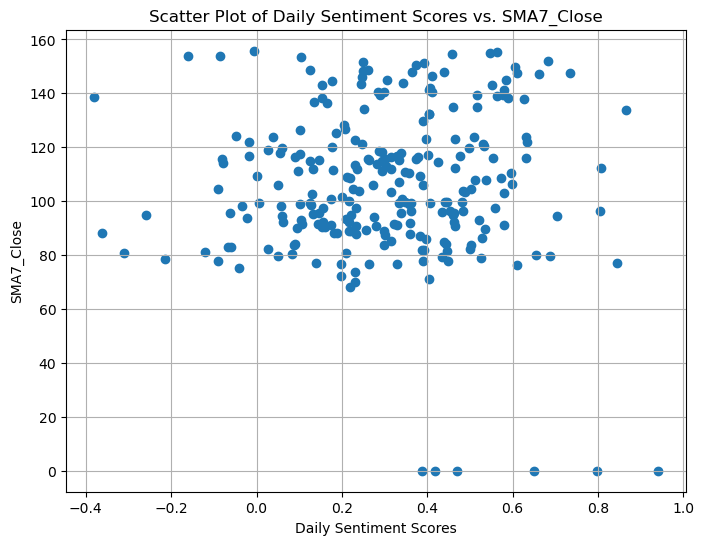

In [13]:
plt.figure(figsize=(8, 6)) # Setting figure size
# Adding features to the scatter plot
plt.scatter(stock_sentiment_AMD['daily_sentiment_scores'], stock_sentiment_AMD['SMA7_Close'])
plt.title('Scatter Plot of Daily Sentiment Scores vs. SMA7_Close') # Adding title to the scatter plot
plt.xlabel('Daily Sentiment Scores') # adding x-axis label
plt.ylabel('SMA7_Close') # adding y-axis label
plt.grid(True) # adding a grid to visualise the most condensed areas of the plot
plt.savefig('ScatterPlot.png') # saving figure as a png file
plt.show() # displaying plot

The graph above compares the relationship between daily sentiment scores and SMA7_Close. The x-axis ranges from -0.4 to 1.0, while the y-axis ranges from 0 to 160. The blue dots scattered across the plot represent each data point. The data points are mainly clustered around 80 and 120 on the y-axis, which corresponds to 0 and 0.6 on the x-axis. However, there is no clear pattern between daily sentiment scores and SMA7_Close.
Overall, the exploratory data analysis process provides valuable insights into the datasets. These insights, including the differences in distribution highlighted by the boxplots, should be taken into account throughout the remainder of our analysis.

# Methods
For this analysis, three main algorithms were used: one supervised machine learning algorithm and two deep learning algorithms; other algorithms were used for model comparisons, such as logistic regression and k-fold cross-validation. I ran these algorithms using a Python script on a Jupyter Notebook.
Firstly, I implemented an Artificial Neural Network, a type of deep learning model, to evaluate the accuracy of the calculated Twitter sentiment scores. Sentiment score will be the target variable for this model.


**ANN**

The architecture for the ANN consists of four layers. The first is an embedding layer with 32 output dimensions and an input dimension of 45,609, representing the number of unique words. A global average pooling is applied to reduce the dimensionality of the output from the embedding layer. Two dense layers were used with 32 and 16 units, respectively, with a 'tanh' activation function. The output layer is a dense layer with 1 unit and a 'sigmoid' activation function, which outputs the sentiment score probability. The model is compiled with a binary cross-entropy loss function and Adam optimiser. 

For this model, the dataset was divided into two parts - a training set containing 80% of the data and a test set containing the remaining 20%. During the training phase, the model analysed and identified patterns in the text data and then classified them into either positive or negative sentiments. Once the model was trained, its accuracy was tested on the test dataset by verifying the number of correctly classified tweets. The accuracy score helps to evaluate the overall performance of the sentiment analysis model. A logistic regression model will be used to compare and evaluate the accuracy of the ANN model. This sentiment score is crucial for accurate analysis and must be considered at all stages of the report.


**Random Forest Classifier**

Next, I utilised a Random Forest Classifier to assess how well my newly added features can predict the movement of AMD stock (whether it will go up or down). I chose the Random Forest Classifier since my dataset includes continuous and complex financial indicators that may not have been well-suited for a Decision Tree model.

I added two more categorical features to represent if the stock had moved up or down from the opening to the closing price. These attributes define the target variables for this model. These feature importance values will be used to evaluate the performance of the sentiment features.

The Random Forest Classifier that was implemented had several parameters. It consisted of 80 trees in the forest, and the square root of the total number of features was considered at each split. 'Gini' impurity was used as the splitting criterion. To reduce overfitting, the maximum depth of a tree was set to 10, and the minimum leaf samples were set to 2. The minimum number of samples required to split an internal node was also set to 2. 

In the training phase, the Random Forest Classifier will analyse the correlation between the feature and target variables, whether the stock goes up or down. It will determine how effectively each feature predicts the stock price movement. This is important for understanding how the sentiment score relates to the financial indicators in terms of importance. A K-fold cross-validation test will be performed to evaluate how well the Random Forest Classifier predicts stock price movement.


**LSTM**

I used the Long Short-Term Memory (LSTM) Recurrent Neural Network as my final algorithm to predict stock prices based on financial indicator features and sentiment features. My dataset comprises temporal data, so I chose LSTM as it could effectively make predictions by utilising this data. 

The LSTM model's architecture comprises three layers. The input layer defines the input shape, determined by the number of features and time steps. The first layer consists of 32 units and returns the complete sequence of outputs for each timestep. The second layer also has 32 units but does not return sequences. Additionally, a dense layer is included with only one unit. The model is compiled with the Adam optimiser and the Mean Squared Error loss function. 

I performed an 80%-20% train-test split on this model. Based on the relevance of date in time series prediction, I decided to split the data by date. During training, the model will learn to predict stock prices by adjusting its parameters to minimise the difference between the predicted and actual stock prices over multiple epochs. 

After training, the model's performance has been evaluated on both training and testing datasets using MSE and RMSE metrics. The metrics will provide insights into how well the model fits the training data. 


# Results/Discussion 
This section will discuss the outcomes of the algorithms used in the analysis. The analysis has been divided into three sections, with different target variables used in each section. These sections are sentiment accuracy, stock movement, and stock prediction.


# Sentiment Accuracy


## Artificial Neural Network (ANN)


**Defining Tokenizer for the ANN**

* Tokenizer is from MA336 LAB 5 for tokenizing all words in the dataframe.

* The num_words parameter has been set to 2000 to avoid the ANN from overfitting the data.

In [14]:
# Define the tokenizer. Using a regex pattern to filter the data.
# Also splitting each word and defining the number of words.
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', 
                      lower=True, num_words = 2000, split=' ')
# Converting the tweets to a list of text
alltext = stock_tweets_new["Tweet"].astype(str).to_list()
# Extract the dictionary of words from the text
tokenizer.fit_on_texts(alltext)
# Create a dataframe with the frequency count of each unique word
tweetwords = pd.DataFrame.from_dict(tokenizer.word_counts, orient="index",columns=["frequency"])
# Show the words between 1000-1020 in the dataframe
tweetwords.sort_values(by="frequency", ascending=False).iloc[1010:1020,:]

# Printing the number of unique words to use as the ANN input_dim.
num_rows = tweetwords.shape[0]
print("Number of Unique Words:", num_rows)

,frequency
yield,289
fund,289
group,289
index,288
friends,288
fans,288
sec,288
setups,287
quick,287
elonmusk,286


Number of Unique Words: 45609


**Defining sequences for sentiment analysis**

* Sequences code was from MA336 LAB 5

* I have adapted this code by increasing the maximum length of a sequence to an appropriate size for the tweets without letting the ANN model overfit.

In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Using the texts_to_sequencees function to add convert text into sequences
# Each word will be assigned a unique number. 
sequences = tokenizer.texts_to_sequences(stock_tweets_new["Tweet"].astype(str).to_list())
# This adds padding, 0s will be added if sequence length does not match the max length
# and numbers will be taken away if sequence is over the maximum length.
padded = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')
# Assigns sequences to a new column in the dataset.
stock_tweets_new["sequences"] = list(padded)
# Displaying dataset.
stock_tweets_new

,Date,Tweet,Stock Name,Company Name,sentiment_score,sequences
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0,"[495, 43, 405, 73, 451, 971, 18, 137, 45, 18, ..."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",0,"[19, 452, 1259, 24, 18, 316, 29, 1, 807, 3, 0,..."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",1,"[27, 191, 28, 11, 1890, 1045, 31, 7, 70, 189, ..."
3,2022-09-29 22:40:07+00:00,Hahaha why are you still trying to stop Tes...,TSLA,"Tesla, Inc.",0,"[161, 24, 17, 131, 658, 2, 455, 19, 267, 1287,..."
4,2022-09-29 22:27:05+00:00,"Stop trying to kill kids, you sad deranged o...",TSLA,"Tesla, Inc.",0,"[455, 658, 2, 1728, 17, 1873, 779, 673, 0, 0, ..."
...,...,...,...,...,...,...
80788,2021-10-07 17:11:57+00:00,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.,0,"[96, 7, 1, 733, 178, 92, 12, 1, 60, 7, 1798, 5..."
80789,2021-10-04 17:05:59+00:00,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.,1,"[21, 81, 12, 1, 115, 8, 4, 1018, 7, 96, 7, 1, ..."
80790,2021-10-01 04:43:41+00:00,Our record delivery results are a testimony of...,XPEV,XPeng Inc.,1,"[139, 562, 452, 618, 24, 4, 7, 139, 7, 953, 10..."
80791,2021-10-01 00:03:32+00:00,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.,1,"[36, 904, 51, 864, 548, 6, 198, 1, 7, 51, 121,..."


**Defining the Training and Validation Accuracy plot and the Training and Validation loss graphs**

* These plots were from MA336 LAB 5

In [16]:
# Defining Function to use as ANN plot
def plot_history(history):
    acc = history.history['accuracy'] # Setting accuracy to the ANN models accuracy.
    val_acc = history.history['val_accuracy'] # Setting val_acc to the ANN models validation accuracy.
    loss = history.history['loss'] # Setting loss to the ANN models Loss.
    val_loss = history.history['val_loss'] # Setting val_loss the the ANN models validation loss.
    x = range(1, len(acc) + 1) # This creates a range from 1 up to the length of acc, then adds 1.

    plt.figure(figsize=(12, 5)) # Plotting figure size.
    plt.subplot(1, 2, 1) # Adding subplot as two tables are being plotted.
    plt.plot(x, acc, label='Training acc') # Plotting the first table with training accuracy
    plt.plot(x, val_acc, label='Validation acc') # and validation accuracy.
    plt.title('Training and validation accuracy') # Adding the title and legend to the plot.
    plt.legend()
    plt.subplot(1, 2, 2) # Adding second plot to the subplot.
    plt.plot(x, loss, label='Training loss') # Plotting Training loss and Validation loss
    plt.plot(x, val_loss, label='Validation loss')
    plt.title('Training and validation loss') # adding a title
    plt.legend() # adding a legend to the plot
    plt.savefig('ArtificialNeuralNetwork.png') # saving the figure as a png file

**Software packages used for ANN**

In [17]:
# Importing the required packages
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split

**Building ANN Model**

* For my model, I adapted the ANN code from MA336 Lab 5 by tuning hyperparameters and changing input dimensions.

C:\Users\maxsh\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 32)             │       1,459,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 32)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,461,089 (5.57 MB)

 Trainable params: 1,461,089 (5.57 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5448 - loss: 0.6831 - val_accuracy: 0.6292 - val_loss: 0.6399
Epoch 2/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6664 - loss: 0.6077 - val_accuracy: 0.6828 - val_loss: 0.5837
Epoch 3/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7521 - loss: 0.5082 - val_accuracy: 0.7809 - val_loss: 0.4564
Epoch 4/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7953 - loss: 0.4469 - val_accuracy: 0.8232 - val_loss: 0.4529
Epoch 5/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.8256 - loss: 0.4140 - val_accuracy: 0.8211 - val_loss: 0.4132
Epoch 6/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.8160 - loss: 0.4175 - val_accuracy: 0.8020 - val_loss: 0.4300
Epoch 7/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.8287 - loss: 0.4028 - val_accuracy: 0.8541 - val_loss: 0.3922
Epoch 8/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.8503 - loss: 0.3769 - val_accu

Training Accuracy: 0.8876
Testing Accuracy:  0.8739


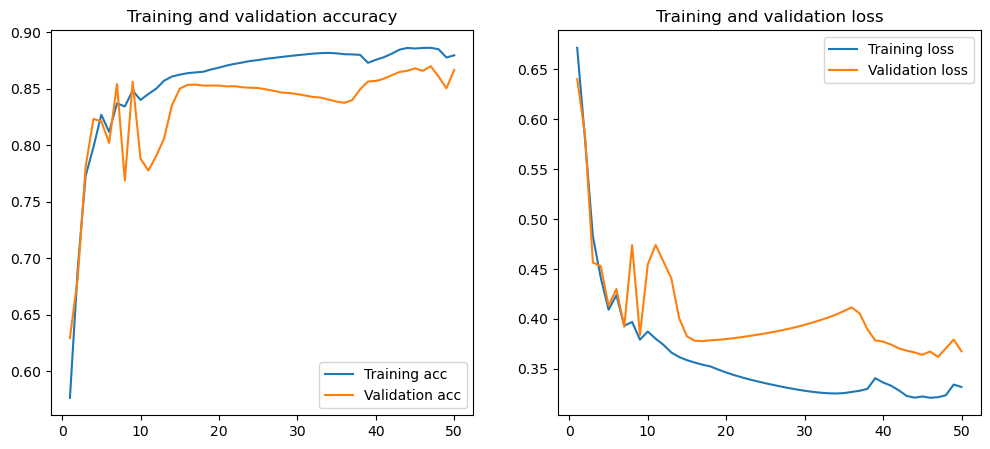

In [18]:
# Setting a seed to achieve a reproductable ANN model.
np.random.seed(1)
tf.random.set_seed(2)

# Setting the sequences to an array to predict the sentiment score.
X = np.array(stock_tweets_new["sequences"].to_list())
# Assigning sentiment_score to the target variable.
y = np.array(stock_tweets_new['sentiment_score'].to_list())

# Creating a train test split of 80%-20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)


# Clearing session so we do not produce false results by repeating training again.
tf.keras.backend.clear_session()

# Adding layers to the model. As mentioned earlier, the number of unqiue words is needed for the parameters,
# I found that there were 45609 unique words used across all tweets, therefore, the input_dim will be set
# to this number of unique words.
model = Sequential()
model.add(Embedding(input_dim=45609, output_dim=32, input_shape=(100,)))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compiling the model with the loss function, optimizer and the metrics.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Displays the model summary before running the model.
model.summary()

# Assigning the number of epochs used for training, the model will train over the data 50 times.
# batch_size has been set to 500, the model will train 500 examples in each iteration.
history = model.fit(X_train, y_train, epochs=50, verbose=True, validation_split=0.2, 
                    batch_size=500, shuffle = False)

# plots the tables using the function created above
print(plot_history(history))


# This will share the Training accuracy and testing accuracy.
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

The graph displays the Artificial Neural Network (ANN) performance metrics concerning the 'sentiment_score' attribute. It shows both training and validation accuracy and training and validation loss. The blue line represents the training set, while the orange line represents the validation set. The X-axis represents the number of epochs used during the training phase. 

I selected 50 epochs for my model to ensure good performance, given the large dataset. Although using more epochs would likely result in higher accuracy, it would also significantly increase the time required for training. Therefore, I chose a batch size of 500 to reduce the time needed for training. Additionally, I set the shuffle parameter to false to ensure reproducibility of the model's results whenever it is run.

Here, the training accuracy was found to be 89%, which means that the ANN model correctly predicted the sentiment of approximately 89% of the tweets in the training dataset. The testing accuracy was followed by a similar outcome of 87%, indicating that the model correctly predicted the sentiment of around 87% of the tweets in the dataset. A similar accuracy suggests that the model is not overfitting to the training data. 

Although there is room for improvement, with over 80,000 tweets and 45,609 unique words in the dataset, achieving an accuracy of 89% is a positive outcome and indicates that this model performs well.


## Logistic regression
**For Sentiment Analysis comparison**


The accuracy of the ANN model was evaluated using a logistic regression model to compare accuracy levels between both models. The logistic regression model was implemented without tuning any hyperparameter and left with its default settings. Using the same 80%-20% train-test split as the ANN model. The confusion matrix of the logistic regression model is shown below. 

**Logistic Regression Model**

* Code Reference: MA336 LAB 5

C:\Users\maxsh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy: 0.5887121727829693


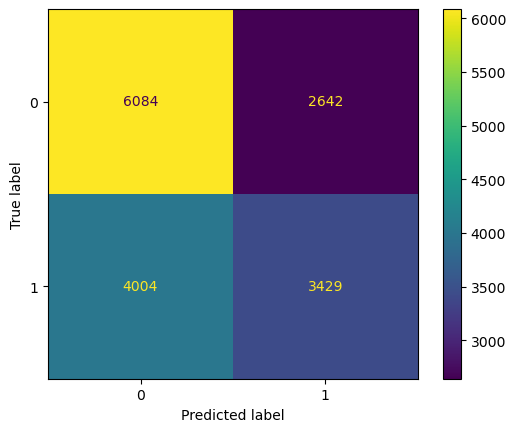

In [19]:
# Setting the target and predictor variables.
# Setting both to a numpy array and converting them into a list.
X = np.array(stock_tweets_new["sequences"].to_list()) # Sequences is the predictor.
y = np.array(stock_tweets_new['sentiment_score'].to_list()) # Sentiment_score is the target.

# Validating the train and test split with a test size of 0.2.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

# Importing the package for logistic regression.
from sklearn.linear_model import LogisticRegression

# Define the Logistic Regression model.
log_classifier = LogisticRegression()
# Train the model on the training dataset.
log_classifier.fit(X_train, y_train)
# Get the accuracy over the test data. 
score = log_classifier.score(X_test, y_test)
print("Accuracy:", score)

# Importing packages for the confusion matrix.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get the predictions from the model.
y_pred = log_classifier.predict(X_test)
# Generate and plot the confusion matrix.
cm = confusion_matrix(y_test, y_pred) # Plotting y_test and y_pred.
disp = ConfusionMatrixDisplay(confusion_matrix=cm) # Setting to display a confusion matrix.
disp.plot() # displaying confusion matrix.
plt.savefig('LogisticRegressionMatrix.png') # saving plot to a png file.
plt.show() # showing plot below.


The confusion matrix compares the model's predictions with the actual labels. The results showed 6084 True Positives instances, 2642 False Negatives, 4004 False Positives, and 3429 True Negatives. However, the accuracy of the logistic regression model only came to 59%, which is lower than the accuracy of the ANN model, at 89%. 
This indicates that the ANN model is better at predicting the sentiment of the tweets. However, I did not tune any hyperparameters for the logistic regression model. Therefore, I believe the accuracy of this model could be increased with further evaluation. 


# Stock Movement


## Random Forest


In [20]:
# Packages for Random Forest
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

**Building Random Forest Classifier**

* Code Reference: MA336 LAB 3 

* I have modified the code to suit my specific task. 

* The hyperparameters have been optimized to obtain a better-performing model. Additionally, I have reworked the feature importance section to identify the percentage of importance for each feature, thereby enabling a more comprehensive analysis of the features.

**Feature Percentages**
* Code Reference: MA336 LAB 3 

* I updated the code by multiplying the feature importances by 100 to calculate percentages and printed them next to the features.

In [21]:
# RANDOM FOREST MODEL

# Setting a seed for reproducable results.
np.random.seed(1)
tf.random.set_seed(2)

# Adding Features list so we can see order of importance
Features = Stock_AMD_rf.columns.tolist()

# Dropping the target attributes from the predictors list
X = Stock_AMD_rf.drop(['Move_Up', 'Move_Down'], axis = 1) # Contains all predictors

X_names = Features[:1] + Features[3:] # Removing the target attributes. Now contains names of all predictors

y = Stock_AMD_rf['Move_Up'] # Applying the Target Variable to object Y
y_names = ['Move_Up', 'Move_Down'] # Class names for each target variable

# Splitting the data into training and testing sets (80%-20% split).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

# Random Forest Classifier with its parameters and fits to training data.
forest = RandomForestClassifier(n_estimators=80, bootstrap=True, max_features= 'sqrt',
                                criterion = 'gini', max_depth = 10, random_state = 8,
                                min_samples_leaf = 2, min_samples_split = 2)
forest.fit(X_train,y_train)

# Predictions on the test and training sets.
y_test_pred = forest.predict(X_test)
print("Accuracy on test set:",round(metrics.accuracy_score(y_test, y_test_pred),2))

y_train_pred = forest.predict(X_train)
print("Accuracy on training set:",round(metrics.accuracy_score(y_train, y_train_pred),2))
print()

#Calculate feature importances and store them inside the dictionary.
feature_importances_dict = {}
for i, name in enumerate(X_names):
    # Multiply each importance value by 100 to get percentage.
    # Adding the importance percentage inside the dictionary.
    feature_importances_dict.update({name: forest.feature_importances_[i] * 100})

# Sort features in descending order of importance.
feature_importances_sorted = dict(sorted(feature_importances_dict.items(), key=lambda x: x[1], reverse=True))

# Print feature in order of performance.
print('Features in order of importance:')
for key, value in feature_importances_sorted.items():
    print(f"{key}: {value:.2f}%")

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=80,
                       random_state=8)

Accuracy on test set: 0.66
Accuracy on training set: 0.99

Features in order of importance:
Stochastic_Oscillator: 23.89%
RSI: 12.15%
SMA20_Close: 12.03%
MACD: 10.67%
Lagged_Sentiment: 9.47%
Sentiment_Change: 8.63%
daily_sentiment_scores: 8.33%
SMA7_Close: 7.74%
SD10_Close: 7.08%


The Random Forest Classifier achieved 99% accuracy on the training set but only 66% on the test set when predicting stock movements based on the correlation with available features. This significant difference between the two sets suggests that the model may be overfitting. However, it's important to note that the achieved accuracy rate on the test set is still noteworthy, considering the amount of feature engineering required for the model. To improve the model's accuracy, additional time and effort will be necessary to test various indicators and determine which ones show the strongest correlation with stock movements.

## Random Forest Feature Importance

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 9 artists>

Text(0.5, 0, 'Importance Percentage')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Feature Importances')

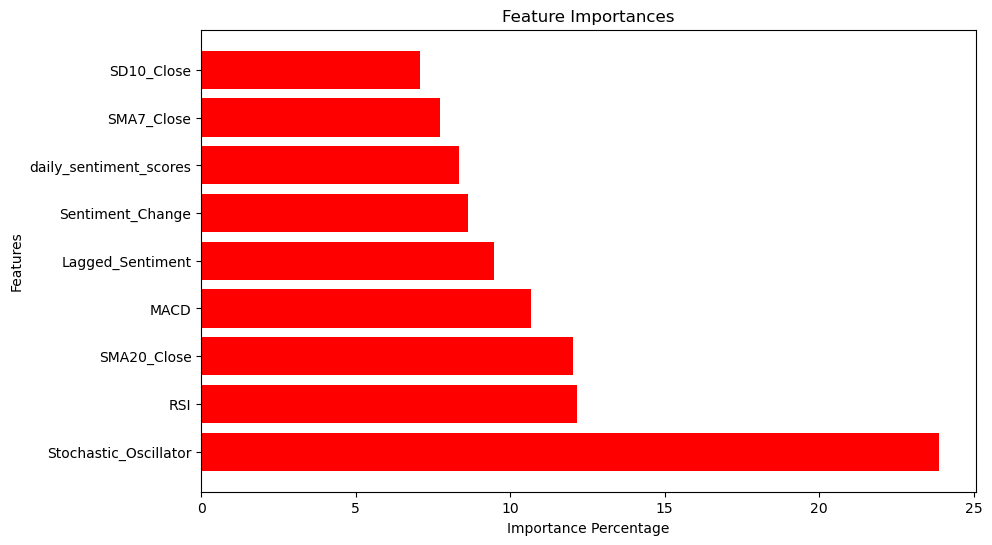

In [22]:
### Feature importance barchart
plt.figure(figsize=(10, 6))
# Plotting horizontal bar chart due to displaying feature names
# Using Dictionary which was created earlier.
plt.barh(list(feature_importances_sorted.keys()), list(feature_importances_sorted.values()), color='red')
plt.xlabel('Importance Percentage') # X-axis label showing importance percentage.
plt.ylabel('Features') # y-axis showing features label.
plt.title('Feature Importances') # plotting feature importances title.
plt.savefig('RandomForestFeatureImportance.png') # Saving the plot as a png file.
plt.show() # Showing plot below.

The feature importances were also calculated for this model to analyse the importance of sentiment within the predictors for predicting stock movement.

This figure depicts the significance of different features in the model. The analysis showed that all three sentiment features account for 26.43% of all features. Among these, lagged sentiment is the most critical feature, with an importance of 9.47% among all sentiment features. This result is expected as other economic indicators are more capable of capturing price changes. However, sentiment features perform well in this model and appear to be an essential factor. They even outperform SMA7_Close and SD10_Close.

This result is as expected since other financial indicators, such as the Stochastic Oscillator, are designed to capture price movements. It scored an impressive 23.89% and was the most important feature within the Random Forest Classifier. However, the sentiment features are still crucial features for this model.

## K-fold Cross-validation
**Random Forest Comparison**

* Code is from MA336 LAB

In [23]:
# Use 5-fold cross-validation to compute the mean accuracy at a tree depth of 4
# Importing the required packages.
import math
from sklearn.model_selection import cross_val_score
# Setting tree max depth to 4.
maxDepth = 4
# Setting the cross-validation to 5-fold
k= 5

# Calculating cross validation scores using the K object which is set to 5.
cv_scores = cross_val_score(forest, X, y, cv=k)
# Printing results
print('Cross-validation scores are:',cv_scores)

# Finding the mean accuracy and standard deviation for the cross-validation.
avg = sum(cv_scores)/len(cv_scores)
sd = math.sqrt(sum((cv_scores-avg)**2)/(len(cv_scores)-1))
# Printing and rounding results for clear results.
print('Average performance for a tree depth of',maxDepth,'is:',np.round(avg*100,1),'+/-',np.round(sd*100,1),'%')

Cross-validation scores are: [0.6        0.64       0.6        0.6        0.57142857]
Average performance for a tree depth of 4 is: 60.2 +/- 2.4 %


I conducted a k-fold cross-validation to evaluate the performance of the Random Forest Classifier. The model was tested with a tree depth of 4, and the average accuracy of the model was found to be 60.2% with a standard deviation of 2.4%. Comparing the results, the accuracy of the Random Forest model on the test set was slightly higher at 66% than the average accuracy obtained from the k-fold cross-validation. These findings suggest that the model performs better with a single test than with multiple tests conducted by the k-fold cross-validation.

# Stock Price Prediction

## Long Term Short Memory Model (LTSM)

In [28]:
# Packages for LTSM
from keras.layers import LSTM, Dense

In [24]:
# Renaming dataframe to represent the new model
Stock_AMD_LTSM = stock_sentiment_AMD

# Dropping unnecessary columns which are not needed for the LTSM model
Stock_AMD_LTSM = Stock_AMD_LTSM.drop(columns = ['Stock Name', 'Tweet', 
                                                'Company Name', 'Move_Up', 'Move_Down'], axis = 1)

# Displaying the dataset which will be used for LTSM
Stock_AMD_LTSM


,Date,daily_sentiment_scores,Open,High,Low,Close,Adj Close,Volume,Lagged_Sentiment,Sentiment_Change,SMA7_Close,SMA20_Close,SD10_Close,RSI,MACD,Stochastic_Oscillator
0,2021-09-30,0.417583,102.080002,104.440002,101.989998,102.900002,102.900002,57636700,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
1,2021-10-01,0.649650,102.599998,103.000000,100.639999,102.449997,102.449997,41491600,0.417583,0.232067,0.000000,0.0000,0.000000,0.000000,-0.035898,0.000000
2,2021-10-04,0.797750,101.739998,101.849998,99.820000,100.339996,100.339996,41967100,0.649650,0.148100,0.000000,0.0000,0.000000,0.000000,-0.231933,0.000000
3,2021-10-05,0.940100,100.919998,102.870003,100.610001,101.809998,101.809998,31455200,0.797750,0.142350,0.000000,0.0000,0.000000,0.000000,-0.265613,0.000000
4,2021-10-07,0.387017,104.599998,107.949997,104.459999,106.449997,106.449997,41543100,0.940100,-0.553083,0.000000,0.0000,0.000000,0.000000,0.081168,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2022-09-23,0.230870,68.000000,69.080002,66.820000,67.959999,67.959999,87690000,-0.040000,0.270870,73.875715,79.8430,4.563866,27.343155,-5.230484,6.044535
245,2022-09-26,0.197480,67.870003,68.739998,66.250000,66.300003,66.300003,82898700,0.230870,-0.033390,72.395715,78.5990,4.209904,27.202626,-5.618555,0.257350
246,2022-09-27,0.403633,67.900002,68.779999,66.000000,67.169998,67.169998,94871800,0.197480,0.206153,71.061429,77.5330,4.510903,27.149126,-5.789170,5.945113
247,2022-09-28,0.230650,67.110001,68.800003,66.559998,68.360001,68.360001,72389500,0.403633,-0.172983,69.860001,76.6040,4.384993,21.434207,-5.761939,11.991873


**LSTM Model**
* The code reference for the LSTM model can be accessed through [14].

* I have made some changes to the code for the LTSM model to suit my specific task.
* I have fine-tuned the hyperparameters to obtain a more well-suited model, and I have scaled the data based on insights gained from the data exploration process. 
* I have also adjusted the shape of y to match the requirements of the model.

In [25]:
# Packages for LTSM
from keras.layers import LSTM

C:\Users\maxsh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 32)              │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,705 (49.63 KB)

 Trainable params: 12,705 (49.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 254ms/step - loss: 0.2397 - val_loss: 0.1438
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1687 - val_loss: 0.0911
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1095 - val_loss: 0.0498
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0622 - val_loss: 0.0273
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0361 - val_loss: 0.0358
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0413 - val_loss: 0.0534
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0512 - val_loss: 0.0447
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0425 - val_loss: 0.0310
Epoch 9/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0344 - val_loss: 0.0258
Epoch 10/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0339 - val_loss: 0.0257
Epoch 11/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0357 - val_loss: 0.0258
Epoch 12/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0357 - val_l

Epoch 70/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0138 - val_loss: 0.0126
Epoch 71/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0138 - val_loss: 0.0126
Epoch 72/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0138 - val_loss: 0.0126
Epoch 73/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0138 - val_loss: 0.0126
Epoch 74/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0138 - val_loss: 0.0125
Epoch 75/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0138 - val_loss: 0.0125
Epoch 76/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0138 - val_loss: 0.0125
Epoch 77/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0138 - val_loss: 0.0125
Epoch 78/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0138 - val_loss: 0.0125
Epoch 79/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0138 - val_loss: 0.0125
Epoch 80/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0138 - val_loss: 0.0125
Epoch 81/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0138

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0134 - val_loss: 0.0122
Epoch 139/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0134 - val_loss: 0.0122
Epoch 140/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0134 - val_loss: 0.0122
Epoch 141/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0134 - val_loss: 0.0122
Epoch 142/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0134 - val_loss: 0.0122
Epoch 143/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0134 - val_loss: 0.0122
Epoch 144/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0134 - val_loss: 0.0122
Epoch 145/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0134 - val_loss: 0.0122
Epoch 146/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0134 - val_loss: 0.0122
Epoch 147/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0134 - val_loss: 0.0122
Epoch 148/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0134 - val_loss: 0.0122
Epoch 149/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0134 -

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0122 - val_loss: 0.0115
Epoch 207/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0122 - val_loss: 0.0115
Epoch 208/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0121 - val_loss: 0.0115
Epoch 209/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0121 - val_loss: 0.0114
Epoch 210/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0120 - val_loss: 0.0114
Epoch 211/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0120 - val_loss: 0.0114
Epoch 212/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0119 - val_loss: 0.0113
Epoch 213/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0119 - val_loss: 0.0113
Epoch 214/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0118 - val_loss: 0.0112
Epoch 215/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0118 - val_loss: 0.0112
Epoch 216/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0117 - val_loss: 0.0111
Epoch 217/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0116 -

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0068 - val_loss: 0.0058
Epoch 275/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0067 - val_loss: 0.0058
Epoch 276/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0067 - val_loss: 0.0058
Epoch 277/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0066 - val_loss: 0.0058
Epoch 278/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0066 - val_loss: 0.0058
Epoch 279/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0065 - val_loss: 0.0058
Epoch 280/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0065 - val_loss: 0.0058
Epoch 281/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0064 - val_loss: 0.0058
Epoch 282/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0064 - val_loss: 0.0058
Epoch 283/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0064 - val_loss: 0.0058
Epoch 284/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0063 - val_loss: 0.0058
Epoch 285/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0063 -

Text(0.5, 1.0, 'Model loss')

Text(0, 0.5, 'Loss')

Text(0.5, 0, 'Epoch')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


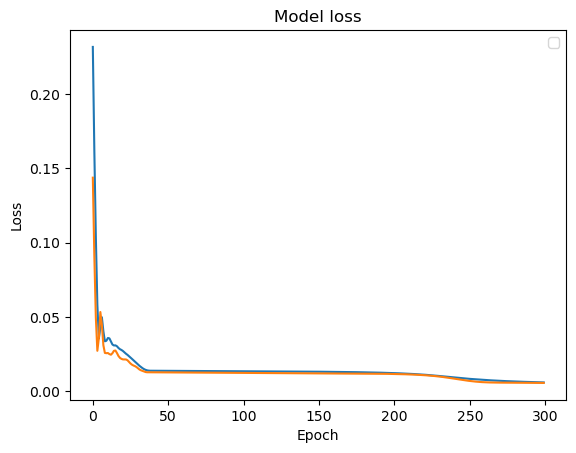

Train Score: 0.01 MSE (0.07 RMSE)
Test Score: 0.01 MSE (0.08 RMSE)


In [26]:
# LTSM MODEL

# Setting random seeds for reproducibility
np.random.seed(1)
tf.random.set_seed(2)


Dates = Stock_AMD_LTSM['Date'] # Storing dates in a new object
# Dropping columns from unnecessary columns from predictors.
X = Stock_AMD_LTSM.drop(columns = ['Close', 'Date', 'High', 'Adj Close', 'Low', 'Volume'], axis = 1)
y = Stock_AMD_LTSM['Close'].values # Assigning target variable to y

# Using scaling to ensure features are on a similar scale.
# To avoid bias results.
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1, 1))
tf.keras.backend.clear_session()
# Splitting data into train and test sets at a 80%-20% split.
# I have decided to split the data based on time as o feel like it is relevant for a time-series stock 
# prediction.
X_train, X_test, y_train, y_test, Dates_train, Dates_test = train_test_split(X, y, Dates, test_size=0.2, 
                                                                             random_state=3)
# Clears exisitng models to start fresh
tf.keras.backend.clear_session()


# This defines the architecture of the LSTM neural network model
# I am using two LSTM layers with 32 units each and Dense layer with 1 unit.
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(1))
 
# This compiles the model using the optimizer adam and loss function MSE which
# will be used during training
model.compile(optimizer='adam', loss='mean_squared_error')
# Prints the model summary
model.summary()

# trains the model using the training data. Shuffle is set to false so data is not
# shuffled during training this is to preserve the order of the data.
history = model.fit(X_train, y_train, epochs=300, verbose=True, validation_split=0.2, 
                    batch_size=64, shuffle = False)


# Taking inspiration from the history plot made for the ANN.
# This code can be found in MA336 LAB 5.
plt.plot(history.history['loss']) # Plotting the loss from the model.
plt.plot(history.history['val_loss']) # Plotting Validation loss.
plt.title('Model loss') # Plotting title.
plt.ylabel('Loss') # Plotting y-axis label.
plt.xlabel('Epoch') # Plotting x-axis label.
plt.legend() # Plotting legend.
plt.savefig('LSTMModelLoss.png') # Saving figure as a png file.
plt.show()

# Printing Train and Test RMSE and MSE Scores from the model.
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))


The graph illustrates the loss of the LSTM model. The blue line shows the training set, while the orange line shows the validation set. The X-axis indicates the number of epochs used for this model, which was 300. This decision to use 300 epochs was made due to the complexity of the dataset, which includes many continuous variables. The large number of epochs will help the model learn patterns within these variables. I also chose to use a batch size of 64, smaller than the ANN batch size. I made this decision because the dataset used in this model is smaller. Therefore, a smaller batch size was used to prevent overfitting. In addition, setting shuffle to false was necessary for this model. The model was trained based on time, so it would be bad if the dates were shuffled, as it would lead to inaccurate results.

The model's train score was measured with the RMSE, which resulted in 0.07, while the test score resulted in 0.8. The graph shows that training and test data decreased rapidly, then they both stabilised at a lower value. This indicates a good balance and suggests that the model is not overfitting. 

Given the model's good performance, using it to make stock price predictions appears feasible. To create a stock price prediction against the actual price of AMD stock, I adjusted the data to ensure the dates were correctly ordered for more accurate visualisation. 


**Stock Price Prediction**

* The code reference can be accessed through [15].

* I have adapted the code to included sorted dates to ensure the time-series data was in the correct order.

* I discovered the numpy function for sorting dates in the numpy documentation, which can be accessed through [16].

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 379ms/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'AMD Stock Price Prediction with LSTM')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Stock Price')

([<matplotlib.axis.XTick at 0x1cee632ccd0>,
 [Text(0.0, 0, '2021-10-05'),
  Text(5.0, 0, '2021-11-03'),
  Text(10.0, 0, '2021-12-06'),
  Text(15.0, 0, '2022-01-03'),
  Text(20.0, 0, '2022-01-31'),
  Text(25.0, 0, '2022-03-08'),
  Text(30.0, 0, '2022-04-18'),
  Text(35.0, 0, '2022-06-15'),
  Text(40.0, 0, '2022-08-02'),
  Text(45.0, 0, '2022-08-26')])

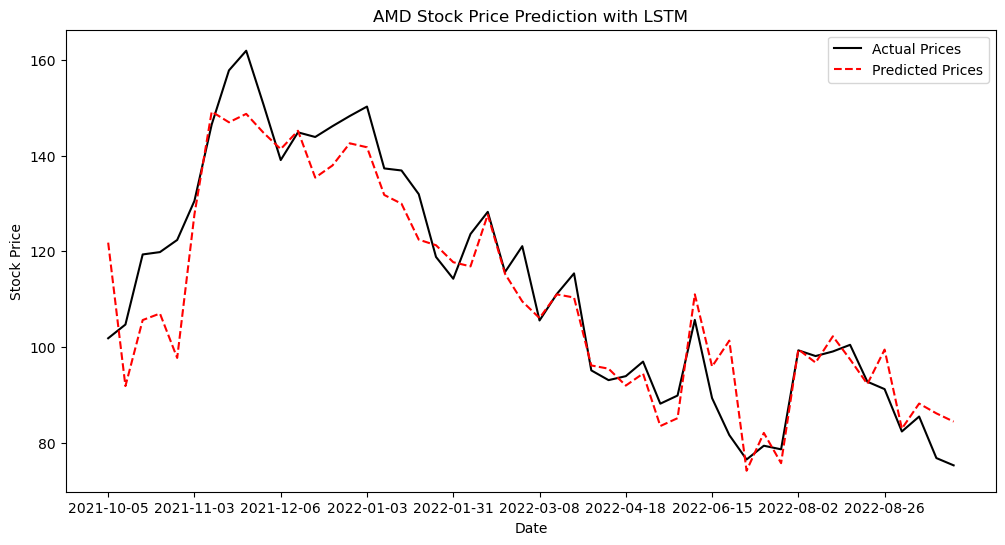

Test MSE: 66.45985502318356
Test RMSE: 8.15229139709711


In [27]:
# Making predictions on the test data using the trained model
# I have also inverse transformed the predicted and actual prices back to the orginal scale
predicted_prices = model.predict(X_test) # Predicting X_test 
predicted_prices = scaler.inverse_transform(predicted_prices) # Original Scale. 
actual_prices = scaler.inverse_transform(y_test) # Original Scale.

# Sorting the test data using the predicited and actual prices based on dates
# I have done this so that the dates are all in order for a more accurate graphical visualisation.
sorted_dates = np.argsort(Dates_test) # Sorting dates
Dates_test_sorted = Dates_test.iloc[sorted_dates] # Sorting Dates_test and assigning to a new dataframe.
predicted_prices = predicted_prices[sorted_dates] # Sorting Predicted_prices.
actual_prices = actual_prices[sorted_dates] # Sorting Actual Prices

# Plotting the predicted prices against the actual prices, with the sorted dates.
plt.figure(figsize=(12, 6)) # Setting figure size.
# Plotting actual prices along with the sorted dates.
plt.plot(Dates_test_sorted, actual_prices, label='Actual Prices', color='black')
# Plotting the predicted prices along with the sorted dates. Represented by a red dotted line.
plt.plot(Dates_test_sorted, predicted_prices, label='Predicted Prices', color='red', linestyle='--')
plt.title('AMD Stock Price Prediction with LSTM') # Adding title.
plt.xlabel('Date') # Adding x-axis label.
plt.ylabel('Stock Price') # Adding y-axis label.
plt.xticks(Dates_test_sorted[::5]) # Setting date labels so x-axis is not crowded.
plt.legend() # Plotting legend.
plt.savefig('LSTM_StockPrediction.png') # Saving plot as a png file. 
plt.show() # Displaying plot below.

# Importing required packages.
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate evaluation metrics.
# This is so I can see the accuracy of the predictions for assessment. 
mse = mean_squared_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_prices, predicted_prices)

print("Test MSE:", mse)
print("Test RMSE:", rmse)

The graph shows the stock price on the y-axis and the dates on the x-axis. To avoid cluttering the graph, only every 5th date label is included. The predicted prices made by the model are shown as a dotted red line, while the black line represents the actual close prices, just as before the model's accuracy was assessed using the RMSE, which resulted in 8.15. 

This is a reasonable score but suggests a slight deviation from the actual price, which is represented by the visualisation; however, it is also clear that the prediction closely follows the price trend movement. Overall, all features including the sentiment features seem to have had a positive impact in predicting the stock price, which is also determined by the Random Forest Classifier feature importances when predicting stock movement.


# Conclusion


Using machine learning techniques, this research project explored the relationship between Twitter sentiments and stock market trends. The study used various models, including ANN, logistic regression, random forest, k-fold testing, and LSTM, to analyse sentiment scores and find the importance of sentiment for stock price predictions.

Results showed that the ANN model outperformed logistic regression, achieving an impressive accuracy of 89% in predicting sentiment scores, while the logistic regression only scored 59%. This accuracy score would likely increase if more hyperparameter tuning were performed on the logistic regression model.

The Random Forest Classifier, which incorporated new features, was promising in predicting stock movement compared to the k-fold test. However, the Random Forest Classifier accuracy was relatively low at 66%, and further feature engineering is required to improve it, testing different sets of features to obtain a high accuracy level will take a considerable amount of time therefore, being inefficient.

The LSTM model achieved an impressive test score of 0.1 RMSE, indicating that it performs very well during training. The LSTM stock prediction also demonstrated the importance of incorporating sentiment features alongside financial indicators in predicting stock prices. With an impressive RMSE accuracy of 8.15, this score further indicates that these features perform well in this model.

Overall, the study highlights the relevance of sentiment analysis in understanding stock market trends and the effectiveness of extracting valuable insights from social media data for machine learning applications. In terms of predicting stock market trends using sentiment scores, the LSTM model is the most reliable as it achieves a more accurate result than the Random Forest Classifier. The latter led to overfitting, which makes the LSTM model more dependable.

To take this research further, more hyperparameter tuning, as mentioned above, could be performed to improve the model's accuracy, and a grid search could be utilised to find optimal parameters. Additionally, real-time data from social media could be incorporated to provide more up-to-date analysis.

Based on my research, sentiment analysis is a reliable method for predicting stock prices. It's important to be cautious when using social media data, such as Twitter data, due to the intentional spread of false information by some users [17]. This false information could be used to manipulate stock prices, leading to inflated rates and potential losses for investors. It's crucial to consider this while dealing with social media data. 


# References

1. A. Sarlan, C. Nadam and S. Basri, "Twitter sentiment analysis," Proceedings of the 6th International Conference on Information Technology and Multimedia, Putrajaya, Malaysia, 2014, pp. 212-216, doi: 10.1109/ICIMU.2014.7066632.
<br>

2. V. S. Pagolu, K. N. Reddy, G. Panda and B. Majhi, "Sentiment analysis of Twitter data for predicting stock market movements," 2016 International Conference on Signal Processing, Communication, Power and Embedded System (SCOPES), Paralakhemundi, India, 2016, pp. 1345-1350, doi: 10.1109/SCOPES.2016.7955659.
<br>

3. Walaa Medhat, Ahmed Hassan, Hoda Korashy, Sentiment analysis algorithms and applications: A survey, Ain Shams Engineering Journal, Volume 5, Issue 4, 2014, Pages 1093-1113, ISSN 2090-4479, https://doi.org/10.1016/j.asej.2014.04.011.
<br>

4. Stock Tweets for Sentiment Analysis and Prediction [Internet]. www.kaggle.com. Available from: https://www.kaggle.com/datasets/equinxx/stock-tweets-for-sentiment-analysis-and-prediction/data.
<br>

5.  Remove URLs from string in Python [Internet]. GeeksforGeeks. 2024 [cited 2024 Apr 7]. Available from: https://www.geeksforgeeks.org/remove-urls-from-string-in-python/.
<br>

6. Python code to remove emoji [Internet]. Gist. [cited 2024 Apr 7]. Available from: https://gist.github.com/n1n9-jp/5857d7725f3b14cbc8ec3e878e4307ce
<br>

7. Emoticons (Emoji), , 80 symbols, Unicode Range: 1F600-1F64F SYMBL [Internet]. symbl.cc. [cited 2024 Apr 8]. Available from: https://symbl.cc/en/unicode/blocks/emoticons/
<br>

8. Python Code Example — VaderSentiment 3.3.1 documentation [Internet]. vadersentiment.readthedocs.io. Available from: https://vadersentiment.readthedocs.io/en/latest/pages/code_and_example.html
<br>

9. pandas.DataFrame.merge — pandas 1.3.4 documentation [Internet]. pandas.pydata.org. Available from: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
<br>

10. RSI And Moving Average Strategy In Python - Quantified Strategies [Internet]. 2024 [cited 2024 Apr 7]. Available from: https://www.quantifiedstrategies.com/relative-strength-index-and-moving-average-trading-strategy/
<br>

11. West Z. Calculating the MACD in Python for Algorithmic Trading [Internet]. αlphαrithms. 2021. Available from: https://www.alpharithms.com/calculate-macd-python-272222/
<br>

12. West Z. Using the Stochastic Oscillator in Python for Algorithmic Trading [Internet]. αlphαrithms. 2023. Available from: https://www.alpharithms.com/stochastic-oscillator-in-python-483214/
<br>

13. Tutorials — Matplotlib 3.6.0 documentation [Internet]. matplotlib.org. Available from: https://matplotlib.org/stable/tutorials/index.html
<br>

14. Training P. TensorFlow LSTM Example: A Beginner’s Guide [Internet]. Pierian Training. 2023 [cited 2024 Apr 7]. Available from: https://pieriantraining.com/tensorflow-lstm-example-a-beginners-guide/
<br>

15. Brownlee J. Time Series Prediction with LSTM Recurrent Neural Networks in Python with Keras [Internet]. Machine Learning Mastery. 2019. Available from: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras
<br>

16. numpy.argsort — NumPy v1.20 Manual [Internet]. numpy.org. Available from: https://numpy.org/doc/stable/reference/generated/numpy.argsort.html
<br>

17. Boididou, C., Papadopoulos, S., Zampoglou, M. et al. Detection and visualization of misleading content on Twitter. Int J Multimed Info Retr 7, 71–86 (2018). https://doi.org/10.1007/s13735-017-0143-x